In [14]:
%matplotlib inline
from matplotlib.patches         import Ellipse
import matplotlib.pyplot as plt
import numpy  as np
import random as rd
import tables as tb

from __future__  import print_function
from scipy.stats import threshold

from keras.models               import Sequential
from keras.layers               import Dense, Activation, Dropout
from keras.optimizers           import SGD, Adam, Nadam         
from keras.callbacks            import EarlyStopping 
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core          import Flatten

In [15]:
# Load data
indata = tb.open_file('pitch_experiment/pitch_exp_100k.h', 'r')
x5  = np.reshape(indata.root.maps5, (len(indata.root.maps5), 1, 43, 43))
x10 = np.reshape(indata.root.maps10, (len(indata.root.maps10), 1, 22, 22))
x15 = np.reshape(indata.root.maps15, (len(indata.root.maps15), 1, 15, 15))
x5 /= np.max(x5)
x10/= np.max(x10)
x15/= np.max(x15)
y_  = np.array(indata.root.coords, dtype=np.float32)
y_ /= 210
#y_ -= .5



In [16]:
# Set up DNNs
model5 = Sequential()
model5.add(Flatten(input_shape=x5[0].shape))
model5.add(Dense(output_dim=1024, activation='relu')) 
model5.add(Dense(output_dim=512,  activation='relu'))
model5.add(Dense(output_dim=256,  activation='relu'))
model5.add(Dense(output_dim=128,  activation='relu'))
model5.add(Dense(output_dim=2,    activation='relu'))
model5.compile(loss='mse', optimizer=Nadam(lr=0.0008, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=4))
#model5.summary()
           
model10 = Sequential()
model10.add(Flatten(input_shape=x10[0].shape))
model10.add(Dense(output_dim=1024, activation='relu')) 
model10.add(Dense(output_dim=512,  activation='relu'))
model10.add(Dense(output_dim=256,  activation='relu'))
model10.add(Dense(output_dim=128,  activation='relu'))
model10.add(Dense(output_dim=2,    activation='relu'))
model10.compile(loss='mse', optimizer=Nadam(lr=0.0008, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=4))
#model10.summary()
           
model15 = Sequential()
model15.add(Flatten(input_shape=x15[0].shape))
model15.add(Dense(output_dim=1024, activation='relu')) 
model15.add(Dense(output_dim=512,  activation='relu'))
model15.add(Dense(output_dim=256,  activation='relu'))
model15.add(Dense(output_dim=128,  activation='relu'))
model15.add(Dense(output_dim=2,    activation='relu'))
model15.compile(loss='mse', optimizer=Nadam(lr=0.0008, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=4))
#model15.summary()

In [17]:
# Set parameters
ntrain = 90000
epochs = 1000

# Create validation set
xtr5  = x5[:ntrain]
xv5   = x5[ntrain:]
xtr10 = x10[:ntrain]
xv10  = x10[ntrain:]
xtr15 = x15[:ntrain]
xv15  = x15[ntrain:]
ytr   = y_[:ntrain]
yv    = y_[ntrain:]

In [18]:
hist5 = model5.fit(xtr5, ytr, nb_epoch=epochs, batch_size=1000, validation_data=(xv5,yv), verbose=0, callbacks=[])

In [19]:
hist10 = model10.fit(xtr10, ytr, nb_epoch=epochs, batch_size=1000, validation_data=(xv10,yv), verbose=0, callbacks=[])

In [20]:
hist15 = model15.fit(xtr15, ytr, nb_epoch=epochs, batch_size=1000, validation_data=(xv15,yv), verbose=0, callbacks=[])

In [37]:
def dist(predictions, yv):
    return np.sqrt((predictions[:, 0] - yv[:, 0])**2 + (predictions[:, 1] - yv[:, 1])**2) * 210

p5 = np.array(model5.predict(xv5))
p10 = np.array(model10.predict(xv10))
p15 = np.array(model15.predict(xv15))

d5 = dist(p5, yv)
d10 = dist(p10, yv)
d15 = dist(p15, yv)

print('Mean error after 1000 epochs for 5mm 10mm and 15mm pitch maps: ')
print(np.mean(d5), np.mean(d10), np.mean(d15))

Mean error after 1000 epochs for 5mm 10mm and 15mm pitch maps: 
0.269642 0.484228 0.646871


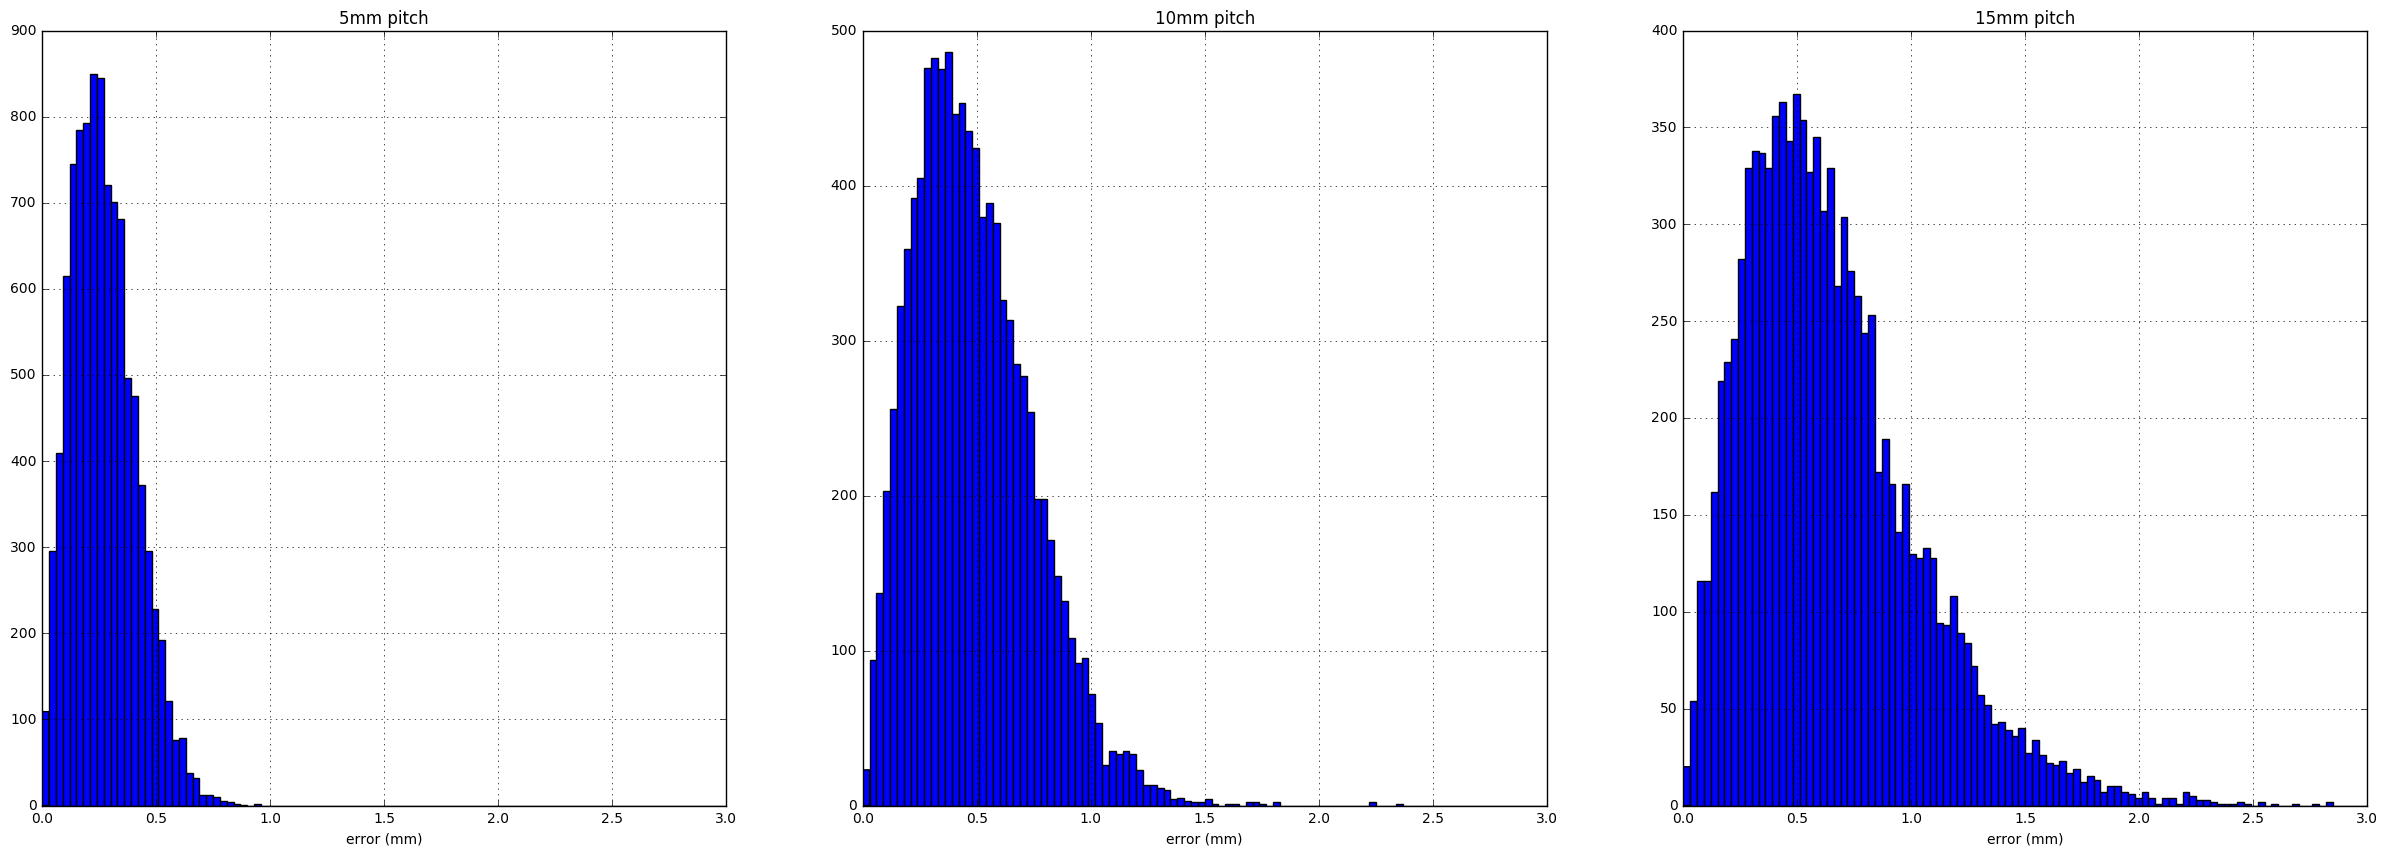

In [36]:
fig = plt.figure();
fig.set_figheight(10.0)
fig.set_figwidth(30.0)

bins = 100
xmax = 3
fig.add_subplot(131);
plt.hist(d5,bins, (0, xmax))
plt.grid(True)
plt.title('5mm pitch')
plt.xlabel('error (mm)')
 
fig.add_subplot(132);
plt.hist(d10, bins, (0,xmax))
plt.grid(True)
plt.title('10mm pitch')
plt.xlabel('error (mm)')

fig.add_subplot(133);
plt.hist(d15, bins, (0,xmax))
plt.grid(True)
plt.title('15mm pitch')
plt.xlabel('error (mm)')
plt.show()

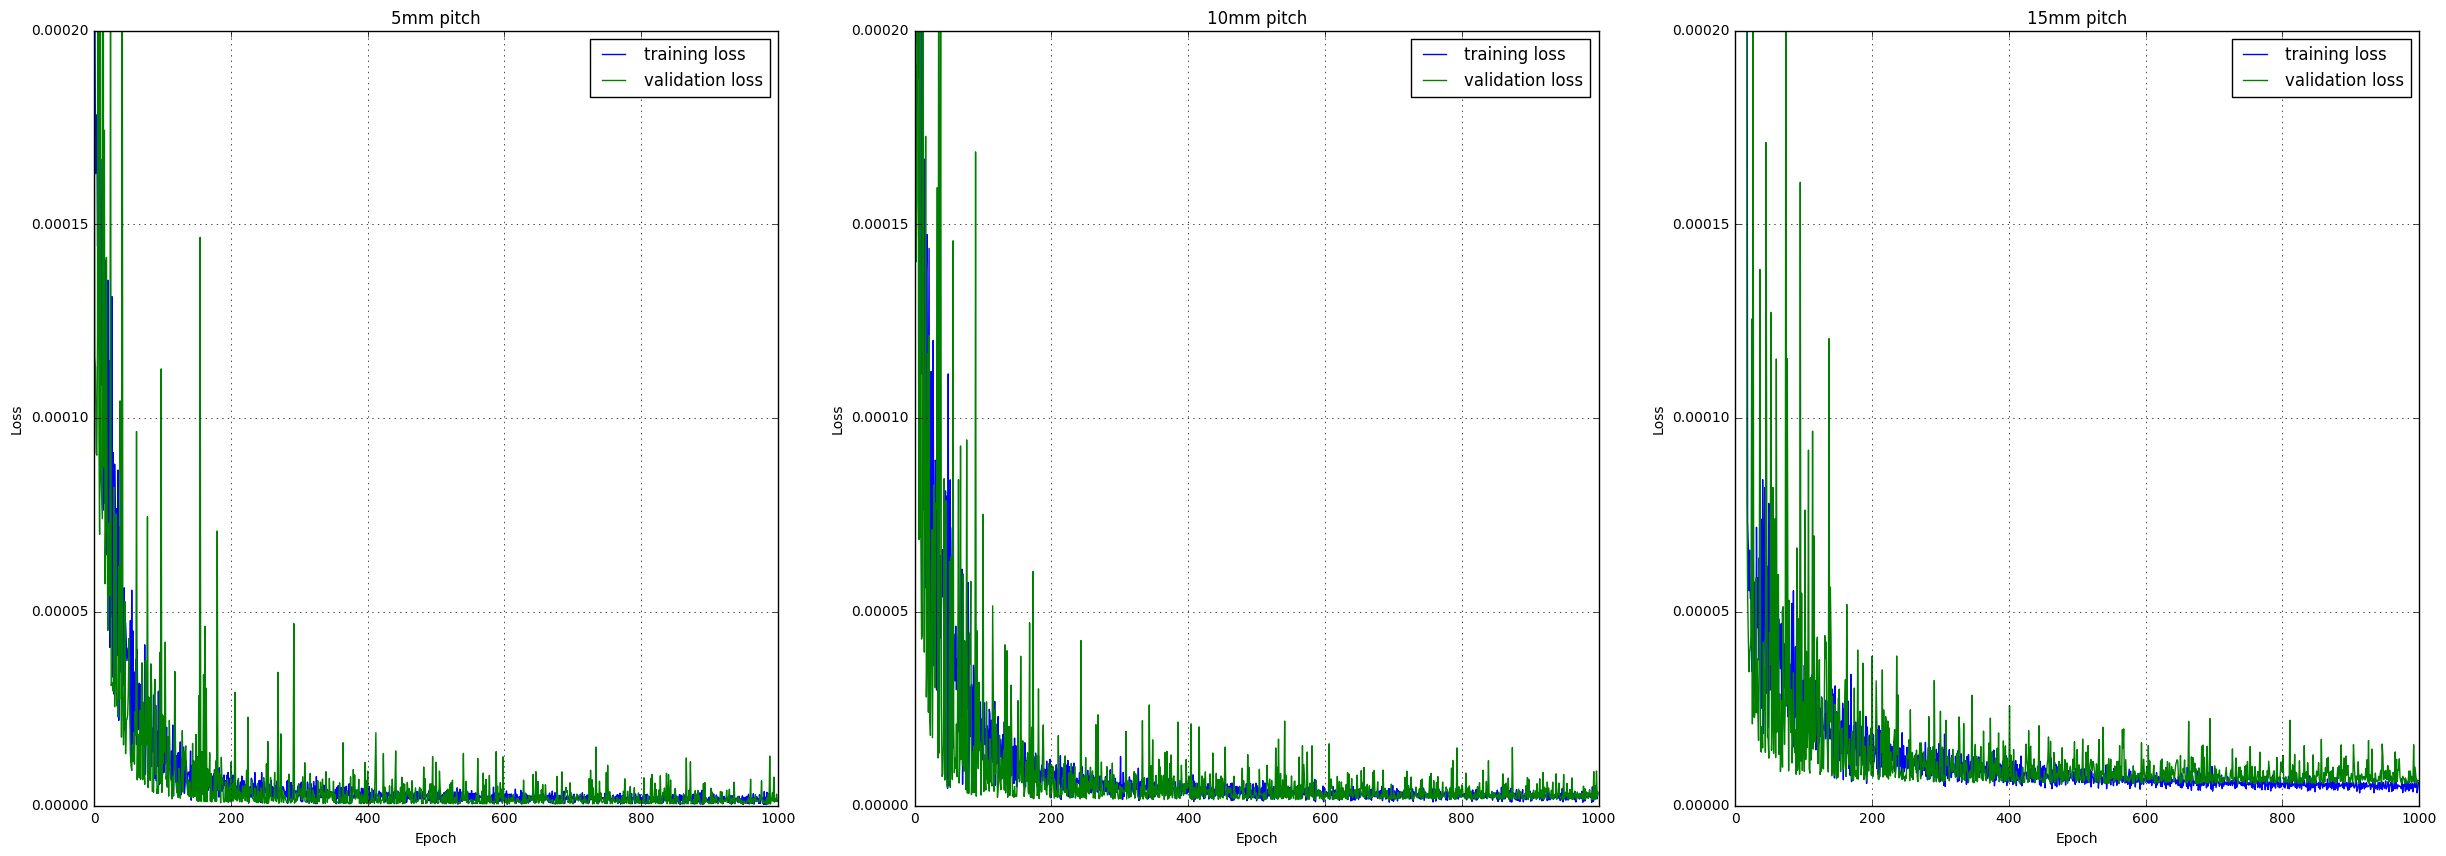

In [30]:
def plot_hist(epochs, hist):
    plt.plot(range(epochs), hist.history['loss'],     label='training loss')
    plt.plot(range(epochs), hist.history['val_loss'], label='validation loss')
    plt.ylim([0,.0002])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True)

fig = plt.figure();
fig.set_figheight(10.0)
fig.set_figwidth(30.0)

fig.add_subplot(131);
plot_hist(epochs, hist5)
plt.title('5mm pitch')

fig.add_subplot(132);
plot_hist(epochs, hist10)
plt.title('10mm pitch')

fig.add_subplot(133);
plot_hist(epochs, hist15)
plt.title('15mm pitch')
plt.show()

/usr/local/lib/python2.7/dist-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/local/lib/python2.7/dist-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/local/lib/python2.7/dist-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/local/lib/python2.7/dist-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/local/lib/python2.7/dist-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/local/lib/python2.7/dist-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


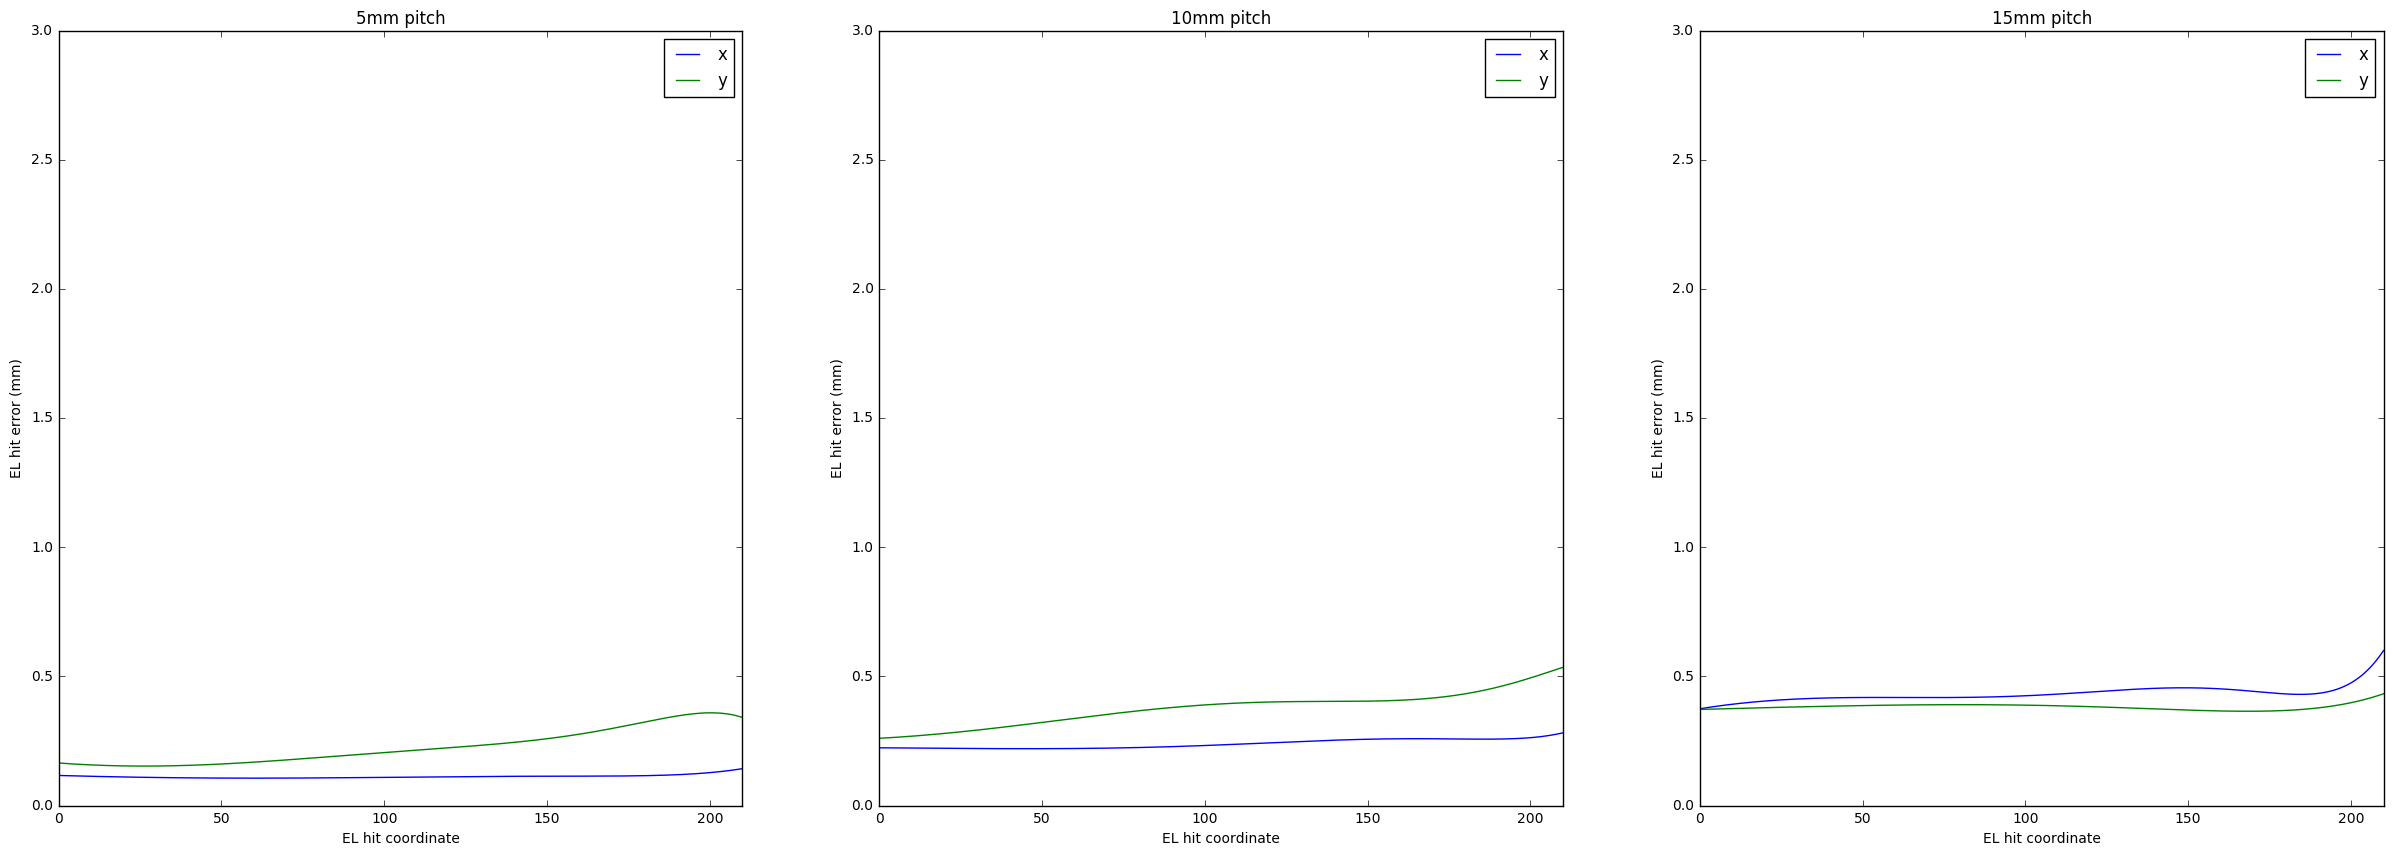

Something strange is going on here ^^^ .... I need to check this out.
It may just be that the network never guesses below zero, but occasionally guesses above 210


In [48]:
def plot_coord_error(predictions, labels):
    """
    Plot error as a function of coordinate 
    """
    gpredictions = predictions*210
    gyv          = labels*210

    xerr = abs(gpredictions[:,0] - gyv[:,0])
    yerr = abs(gpredictions[:,1] - gyv[:,1])
    
    # could replace these best fit lines with something average data points
    # x, y error as a function of x, y  EL hit coordinate
    order = 10
    bestfitx = plt.plot(np.unique(gyv[:,0]), np.poly1d(np.polyfit(gyv[:,0],xerr, order))(np.unique(gyv[:,0])),label='x')
    bestfitx = plt.plot(np.unique(gyv[:,1]), np.poly1d(np.polyfit(gyv[:,1],yerr, order))(np.unique(gyv[:,1])),label='y')
    plt.legend(loc='upper right')
    plt.xlabel('EL hit coordinate')
    plt.ylabel('EL hit error (mm)')
    plt.xlim(0,210)
    plt.ylim(0, 3)

fig = plt.figure();
fig.set_figheight(10.0)
fig.set_figwidth(30.0)

fig.add_subplot(131);
plot_coord_error(p5, yv)
plt.title('5mm pitch')

fig.add_subplot(132);
plot_coord_error(p10, yv)
plt.title('10mm pitch')

fig.add_subplot(133);
plot_coord_error(p15, yv)
plt.title('15mm pitch')
plt.show()

print('Something strange is going on here ^^^ .... I need to check this out.')
print('It may just be that the network never guesses below zero, but occasionally guesses above 210')

/usr/local/lib/python2.7/dist-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/local/lib/python2.7/dist-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/usr/local/lib/python2.7/dist-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


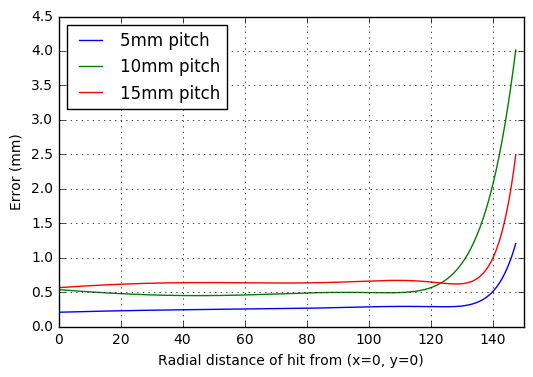

In [46]:
def error_rad_plot(e5, e10, e15, label):
    """
    error_rad_plot plots error as a function of radial difference from (x=0, y=0)
    of the actual position of the hit. Diffusion and no diffusion
    """
    rad = np.sqrt((label[:,0] - 105)**2 + (label[:,1] - 105)**2)
    order = 40
    bestfit = plt.plot(np.unique(rad), np.poly1d(np.polyfit(rad, e5, order))(np.unique(rad)), label='5mm pitch')
    bestfit = plt.plot(np.unique(rad), np.poly1d(np.polyfit(rad, e10, order))(np.unique(rad)), label='10mm pitch')
    bestfit = plt.plot(np.unique(rad), np.poly1d(np.polyfit(rad, e15, order))(np.unique(rad)), label='15mm pitch')

    plt.grid(True)
    plt.xlabel('Radial distance of hit from (x=0, y=0)')
    plt.ylabel('Error (mm)')
    plt.xlim(0, 150)
    plt.legend(loc='upper left')
    plt.show()

error_rad_plot(d5, d10, d15, yv*210)
